# Introduction to NLP and Large Language Models

This notebook provides an introduction to Natural Language Processing (NLP) and Large Language Models (LLMs), building on our previous knowledge of neural networks, CNNs, RNNs, and GANs.

## I. From Neural Networks to Natural Language Processing

### A. Brief Review of Neural Network Architectures

In previous labs, we've seen a selection of neural network architectures, including:

#### Basic Neural Networks (NN)
- Fully connected layers
- Activation functions
- Backpropagation

#### Convolutional Neural Networks (CNN)
- Convolutional layers
- Pooling operations
- Effective for image processing and pattern recognition

#### Recurrent Neural Networks (RNN)
- Sequential data processing
- Hidden state memory
- Variants: LSTM and GRU to address vanishing gradient

#### Generative Adversarial Networks (GAN)
- Generator and discriminator networks
- Adversarial training process
- Used for generating synthetic data

### B. The Language Challenge

Why does text require special approaches?

1. **Discrete nature**: Text consists of discrete tokens (words/characters) rather than continuous values
2. **Variable length**: Sentences and documents have different lengths
3. **Contextual dependencies**: Meaning depends on context, which can span long distances
4. **Hierarchical structure**: Words form phrases, which form sentences, which form paragraphs, etc.
5. **Ambiguity**: Language is inherently ambiguous at multiple levels

## II. Fundamentals of Natural Language Processing

### A. Key NLP Tasks

Let's explore some fundamental NLP tasks and implement simple examples:

In [ ]:
#!pip install nltk spacy transformers datasets gensim
#!python -m spacy download en_core_web_sm

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.0 MB 3.7 MB/s eta 0:00:07
   -- ------------------------------------- 1.3/24.0 MB 4.5 MB/s eta 0:00:06
   --- ------------------------------------ 1.8/24.0 MB 2.9 MB/s eta 0:00:08
   ---- ----------------------------------- 2.9/24.0 MB 3.5 MB/s eta 0:00:07
   ------- -------------------------------- 4.7/24.0 MB 4.5 MB/s eta 0:00:05
   --------- ------------------------------ 5.5/24.0 MB 4.7 MB/s eta 0:00:04
   ----------- ---------------------------- 7.1/24.0 MB 5.0 MB/s eta 0:00:04
   -------------- ------------------------- 8.7/24.0 MB 5.3 MB/s eta 0:00:03
   ----------------- ---------------------- 10.2/24.0 MB 5.5 MB/s eta 0:00:03
   ------------------- -------------------- 11.5/24.0 MB 5.6 MB/s eta 0:00:03
   -------------------- ------------------- 12.6/24.0 MB 5.8 MB/s eta 0:00:02
   ---------------------- ----------------- 13.6/24.0 MB 5.7 MB/s eta 0:00:02
  

  You can safely remove it manually.
  You can safely remove it manually.


In [10]:
# Import required libraries
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\u0086305\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\u0086305\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u0086305\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\u0086305\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\u0086305\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\u0086305\AppData\Roaming\nltk_data...
[nltk_data]   U

#### 1. Tokenization and Text Preprocessing

##### Tokenization:

Tokenization is the process of breaking down a piece of text (a sentence, paragraph, or document) into smaller units called "tokens." These tokens are typically words, but they can also be subwords, characters, or punctuation marks. Essentially, it's about converting a string of characters into a list of meaningful units that a computer can process.

Computers don't understand text in the same way humans do. They need data in a structured format. Tokenization provides this structure. It's the first step in many NLP pipelines, as subsequent tasks like parsing, tagging, and analysis rely on having the text broken down into tokens.

Types of Tokenization:
* Word Tokenization: Splits text into individual words. This is the most common type.
* Subword Tokenization: Splits words into smaller units, like prefixes, suffixes, or word fragments. This is particularly useful for handling out-of-vocabulary words or languages with complex morphology. Common methods include Byte-Pair Encoding (BPE) and WordPiece.
* Character Tokenization: Splits text into individual characters. This is less common but can be useful for certain tasks.
* Punctuation Tokenization: Handling punctuation is also a very important part of tokenization. Some tokenizers will give punctuation its own token, and others will remove it.

Example:
* Input: "The quick brown fox jumps over the lazy dog."
* Word Tokenization Output: ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog", "."]

##### Text Preprocessing

Text preprocessing involves cleaning and transforming text data to make it more suitable for NLP tasks. It's about getting the text into a consistent and usable format.

Raw text data is often messy and inconsistent, containing noise like punctuation, special characters, and variations in capitalization. Preprocessing helps to reduce this noise and improve the accuracy of NLP models.

Common Preprocessing Techniques:
* Lowercasing: Converting all text to lowercase to ensure consistency.
* Removing Punctuation: Eliminating punctuation marks that may not be relevant to the analysis.
* Removing Stop Words: Removing common words like "the," "a," and "is" that often don't carry much semantic meaning.
* Stemming: Reducing words to their root form (e.g., "running" to "run").
* Lemmatization: Reducing words to their base dictionary form (e.g., "better" to "good"). Lemmatization is generally preferred over stemming as it produces valid words.
* Removing Special Characters and Numbers: Eliminating characters or numbers that are not relevant.
* Handling Missing Values: Addressing missing or incomplete text data.
* Normalization: Converting text to a standard format, such as handling accented characters or different encoding schemes.

Example:
* Input: "The QUICK, brown fox... jumped over the lazy dogs!!"
* Preprocessing Steps: Lowercasing, removing punctuation, removing stop words.
* Output: ["quick", "brown", "fox", "jumped", "lazy", "dogs"]

In [8]:
text = "Natural Language Processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language."

# NLTK tokenization
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

# Sentence tokenization
sentences = sent_tokenize(text)
print(f"Sentences: {sentences}")

# Word tokenization
words = word_tokenize(text)
print(f"Words: {words[:10]}...")

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print(f"After stopword removal: {filtered_words[:10]}...")

# Lemmatization with spaCy
doc = nlp(text)
lemmas = [token.lemma_ for token in doc]
print(f"Lemmatized: {lemmas[:10]}...")

Sentences: ['Natural Language Processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language.']
Words: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of']...
After stopword removal: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'subfield', 'linguistics', ',', 'computer']...
Lemmatized: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'be', 'a', 'subfield', 'of']...


#### 2. Part-of-Speech Tagging

Part-of-Speech (POS) tagging is a fundamental task in Natural Language Processing (NLP) that involves labeling each word in a text with its corresponding grammatical category, or "part of speech." Essentially, it's about identifying the role each word plays in a sentence.

##### Key Concepts:

* Assigning Grammatical Labels: POS tagging assigns tags like noun (NN), verb (VB), adjective (JJ), adverb (RB), preposition (IN), etc., to each word in a sentence. These tags provide information about the syntactic function of each word.
* Contextual Analysis: POS tagging isn't just about looking up words in a dictionary. It requires understanding the context in which a word appears. A word can have different POS tags depending on its usage. For example, "run" can be a verb ("I run every day") or a noun ("He went for a run").

Example:
* Sentence: "The cat sat on the mat."
* POS Tags:
    * "The" - Determiner (DT)
    * "cat" - Noun (NN)
    * "sat" - Verb (VBD)
    * "on" - Preposition (IN)
    * "the" - Determiner (DT)
    * "mat" - Noun (NN)

In [11]:
# POS tagging with NLTK
from nltk import pos_tag

nltk_pos = pos_tag(words)
print("NLTK POS Tagging:")
print(nltk_pos[:10])

# POS tagging with spaCy
print("\nspaCy POS Tagging:")
for token in doc[:10]:
    print(f"{token.text}: {token.pos_}")

NLTK POS Tagging:
[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('is', 'VBZ'), ('a', 'DT'), ('subfield', 'NN'), ('of', 'IN')]

spaCy POS Tagging:
Natural: PROPN
Language: PROPN
Processing: PROPN
(: PUNCT
NLP: PROPN
): PUNCT
is: AUX
a: DET
subfield: NOUN
of: ADP


#### 3. Named Entity Recognition (NER)

Named Entity Recognition (NER) is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories, such as person names, organizations, locations, times, quantities, monetary values, percentages, etc.   

* Identifying Entities: NER systems scan text and identify words or phrases that represent named entities. These entities are typically proper nouns, but they can also include numerical expressions.   
* Classifying Entities: Once an entity is identified, NER classifies it into a pre-defined category.   
    * Common categories include:
        * PER (Person): Names of individuals.   
        * ORG (Organization): Names of companies, institutions, etc.   
        * LOC (Location): Names of places (countries, cities, etc.).   
        * DATE (Date): Dates and times.   
        * GPE (Geopolitical Entity): Countries, cities, states.   
        * MONEY (Monetary Value): Amounts of money.   
* Contextual Understanding: NER systems need to understand the context in which entities appear. For example, "Washington" could refer to a person (George Washington) or a location (Washington D.C.).

In [12]:
ner_text = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976 in Cupertino, California."
doc = nlp(ner_text)

print("Named Entities:")
for ent in doc.ents:
    print(f"{ent.text}: {ent.label_}")

# Visualize entities
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

Named Entities:
Apple Inc.: ORG
Steve Jobs: PERSON
Steve Wozniak: PERSON
Ronald Wayne: PERSON
1976: DATE
Cupertino: GPE
California: GPE


#### 4. Sentiment Analysis

Sentiment analysis, also known as opinion mining, is a technique used in Natural Language Processing (NLP) to determine the emotional tone or subjective information expressed in a piece of text. It aims to understand whether the writer's attitude towards a particular topic, product, or service is positive, negative, or neutral.

##### Key Concepts:

* Determining Emotional Tone:
    * Sentiment analysis analyzes text to identify the underlying sentiment or opinion. It categorizes text into different sentiment classes, typically:
        * Positive: Expressing favorable opinions, happiness, or satisfaction.
        * Negative: Expressing unfavorable opinions, anger, or dissatisfaction.
        * Neutral: Expressing objective statements or factual information without strong emotional content.
* Subjectivity vs. Objectivity:
    * Sentiment analysis focuses on subjective expressions, rather than objective facts. It aims to identify opinions, feelings, and attitudes.
* Granularity:
    * Sentiment analysis can be performed at different levels of granularity:
        * Document-level: Analyzing the overall sentiment of an entire document.
        * Sentence-level: Analyzing the sentiment of individual sentences.
        * Aspect-level: Analyzing the sentiment towards specific aspects or features of a product or service.

Sentiment Analysis is used to analyze customer feedback, social media, market research, political analysis, brand reputation, etc.

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Sample sentences
sentences = [
    "I love this product! It works amazingly well.",
    "This is okay, but not great.",
    "I hate this product. It's terrible and doesn't work.",
    "The conference on NLP was informative and interesting."
]

# Get sentiment scores
for sentence in sentences:
    sentiment = sia.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {sentiment}")
    print(f"Overall: {'Positive' if sentiment['compound'] > 0.05 else 'Negative' if sentiment['compound'] < -0.05 else 'Neutral'}\n")

Sentence: I love this product! It works amazingly well.
Sentiment: {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'compound': 0.7836}
Overall: Positive

Sentence: This is okay, but not great.
Sentiment: {'neg': 0.449, 'neu': 0.404, 'pos': 0.147, 'compound': -0.6112}
Overall: Negative

Sentence: I hate this product. It's terrible and doesn't work.
Sentiment: {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.7783}
Overall: Negative

Sentence: The conference on NLP was informative and interesting.
Sentiment: {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}
Overall: Positive



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\u0086305\AppData\Roaming\nltk_data...


### B. Traditional NLP Approaches

#### 1. Rule-based Systems
- Handcrafted rules for specific tasks
- Example: Regular expressions for pattern matching

In [14]:
import re

# Example: Extracting emails using regex
text = "You can contact me at john.doe@example.com or support@company.org for assistance."
email_pattern = r'[\w\.-]+@[\w\.-]+\.[a-zA-Z]{2,}'
emails = re.findall(email_pattern, text)
print(f"Extracted emails: {emails}")

Extracted emails: ['john.doe@example.com', 'support@company.org']


#### 2. Statistical Methods
- Frequency-based approaches
- TF-IDF (Term Frequency-Inverse Document Frequency)
    * TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that determines the importance of a word within a document relative to a collection of documents (corpus).
        * TF (Term Frequency) measures how often a word appears in a single document.
        * IDF (Inverse Document Frequency) measures how rare a word is across the entire corpus.
        * TF-IDF combines these measures, giving higher weights to words that are frequent in a specific document but rare in the corpus.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "NLP is a subfield of AI and linguistics.",
    "Machine learning is central to AI research.",
    "Deep learning models are used in various NLP tasks.",
    "Transformers have revolutionized NLP."
]

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Display feature names (words)
feature_names = vectorizer.get_feature_names_out()
print("Feature names (words):")
print(feature_names)

# Display TF-IDF values for the first document
print("\nTF-IDF values for first document:")
first_doc_vector = tfidf_matrix[0]
for i, value in enumerate(first_doc_vector.toarray()[0]):
    if value > 0:
        print(f"{feature_names[i]}: {value:.4f}")

Feature names (words):
['ai' 'and' 'are' 'central' 'deep' 'have' 'in' 'is' 'learning'
 'linguistics' 'machine' 'models' 'nlp' 'of' 'research' 'revolutionized'
 'subfield' 'tasks' 'to' 'transformers' 'used' 'various']

TF-IDF values for first document:
ai: 0.3317
and: 0.4207
is: 0.3317
linguistics: 0.4207
nlp: 0.2685
of: 0.4207
subfield: 0.4207


#### 3. Word Embeddings
- Distributed representations of words
- Words with similar meanings have similar vectors

Word embeddings are a type of word representation that allows words with similar meanings to have a similar representation. They are a crucial component of many Natural Language Processing (NLP) tasks, enabling computers to understand the semantic relationships between words.   

##### Key Concepts:

* Dense Vector Representations:
    * Instead of representing words as discrete symbols (like one-hot encoding), word embeddings represent words as dense vectors of real numbers. These vectors are typically of lower dimensionality than one-hot vectors, capturing semantic relationships in a more compact way.   
* Semantic Similarity:
    * The key idea behind word embeddings is that words with similar meanings have similar vector representations. This means that the vectors of semantically related words will be close to each other in the embedding space.   
* Contextual Understanding:
    * Modern word embeddings, like those from transformer models, can also capture contextual information. This means that the embedding of a word can vary depending on its surrounding words.   

##### Benefits:

* Improved NLP Performance:
    * Word embeddings significantly improve the performance of many NLP tasks, such as:
        * Text classification
        * Sentiment analysis   
        * Machine translation   
        * Question answering   
* Capturing Semantic Relationships:
    * They allow NLP models to understand the relationships between words, such as synonyms, antonyms, and analogies.   
* Reducing Dimensionality:
    * They reduce the dimensionality of word representations, making it more efficient to process large amounts of text data.   
* Generalization:
    * Word embeddings allow models to generalize better. If a model has seen the word dog during training, and cat has a similar embedding, then the model can more easily understand the word cat.

##### Methods for Creating Word Embeddings:

* Traditional Methods (Word2Vec, GloVe):
    * Word2Vec:
        * Uses a shallow neural network to predict either the surrounding words (CBOW) or the target word (Skip-gram).   
        * Learns word embeddings by optimizing the network to predict word co-occurrences.   
    * GloVe (Global Vectors for Word Representation):
        * Learns word embeddings by analyzing the global co-occurrence statistics of words in a corpus.   
        * Constructs a word-context co-occurrence matrix and factorizes it to obtain word embeddings.   
  
* Contextual Embeddings (BERT, Transformer-based models):
    * BERT (Bidirectional Encoder Representations from Transformers):
        * Uses a transformer architecture to learn bidirectional representations of words.
        * Can capture complex contextual dependencies.
    * These models are trained on very large datasets.   
  
Example:
* In a word embedding space, the vectors for "king" and "queen" would be close to each other, as would the vectors for "man" and "woman."   
* Furthermore, you can perform vector arithmetic. For example, "king" - "man" + "woman" would result in a vector that is close to the vector for "queen."

Words similar to 'learning':
have: 0.1607
embeddings: 0.1592
transformers: 0.1372


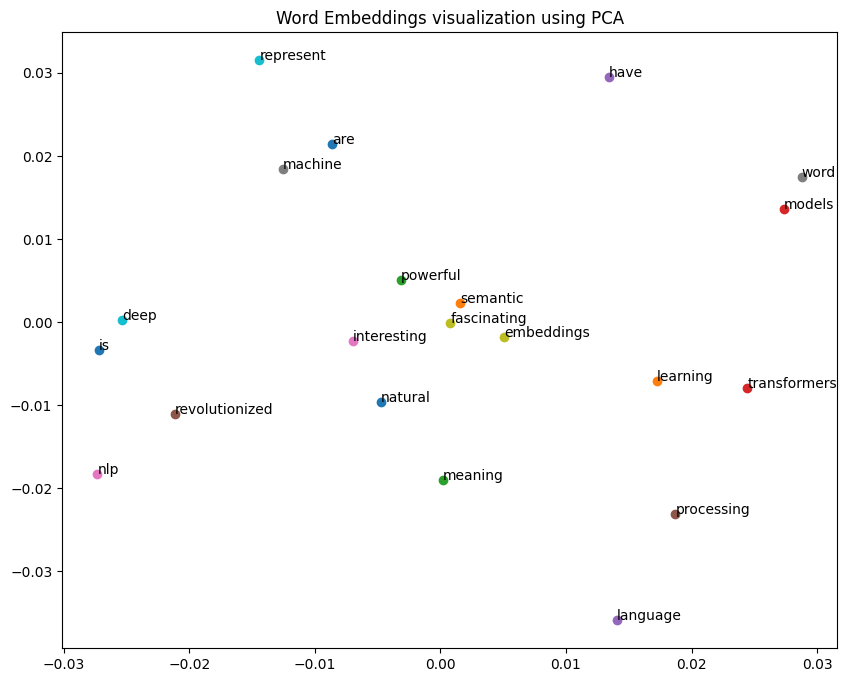

In [19]:
from gensim.models import Word2Vec

# Sample sentences
sentences = [
    ["natural", "language", "processing", "is", "interesting"],
    ["machine", "learning", "is", "fascinating"],
    ["deep", "learning", "models", "are", "powerful"],
    ["transformers", "have", "revolutionized", "nlp"],
    ["word", "embeddings", "represent", "semantic", "meaning"]
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = model.wv

# Find similar words
if "learning" in word_vectors:
    similar_words = word_vectors.most_similar("learning", topn=3)
    print("Words similar to 'learning':")
    for word, score in similar_words:
        print(f"{word}: {score:.4f}")

# Visualize word vectors using PCA
from sklearn.decomposition import PCA

# Get all word vectors
words = list(word_vectors.index_to_key)
vectors = [word_vectors[word] for word in words]

# Apply PCA
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(result[i, 0], result[i, 1])
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word Embeddings visualization using PCA")
plt.show()

## III. The Rise of Transformer Architecture

### A. Limitations of RNNs for Language Tasks

While RNNs (and their variants like LSTM and GRU) were a significant step forward for NLP, they had several limitations:

1. **Sequential processing**: Processing words one by one, making parallelization difficult
2. **Vanishing/exploding gradients**: Despite LSTM/GRU improvements, still an issue for very long sequences
3. **Limited context window**: Practical difficulty in capturing long-range dependencies
4. **Computational efficiency**: Training RNNs is slow due to their sequential nature

### B. Attention Mechanisms Explained

Attention mechanisms were developed to address these limitations by allowing the model to focus on different parts of the input sequence when producing each part of the output.

#### Key Concepts:

* Focusing on Relevant Information:
    * Attention mechanisms allow the model to selectively focus on different parts of the input sequence when generating each part of the output. Instead of processing the entire input sequence in a fixed way, the model dynamically assigns weights to different input elements, indicating their importance.
* Dynamic Weighting:
    * These mechanisms compute "attention weights" that determine how much attention should be paid to each input element. For example, when translating a sentence, the model might pay more attention to the subject of the sentence when generating the corresponding word in the target language.
* Improving Long-Range Dependencies:
    * By allowing the model to directly access any part of the input sequence, attention mechanisms help to alleviate the vanishing gradient problem and improve the model's ability to capture long-range dependencies.
* Enabling Parallelization:
    * While attention mechanisms can be used within RNNs, they are the base of the transformer architecture, that does not rely on recurrent connections, and thus can be highly parallelized.

#### Attention Process:

1. Queries, Keys, and Values:
    * The model generates "queries," "keys," and "values" from the input sequence.
    * A query is what you are looking for, a key is what you are comparing against, and a value is the information that is extracted.
2. Computing Attention Scores:
    * The model calculates the similarity between each query and each key, producing "attention scores."
    * These scores indicate how relevant each input element is to the current output.
3. Applying Softmax:
    * The attention scores are passed through a softmax function to normalize them into probabilities.
4. Weighted Sum:
    * The model computes a weighted sum of the values, where the weights are the normalized attention scores.
    * This weighted sum represents the "context vector," which captures the relevant information from the input sequence.

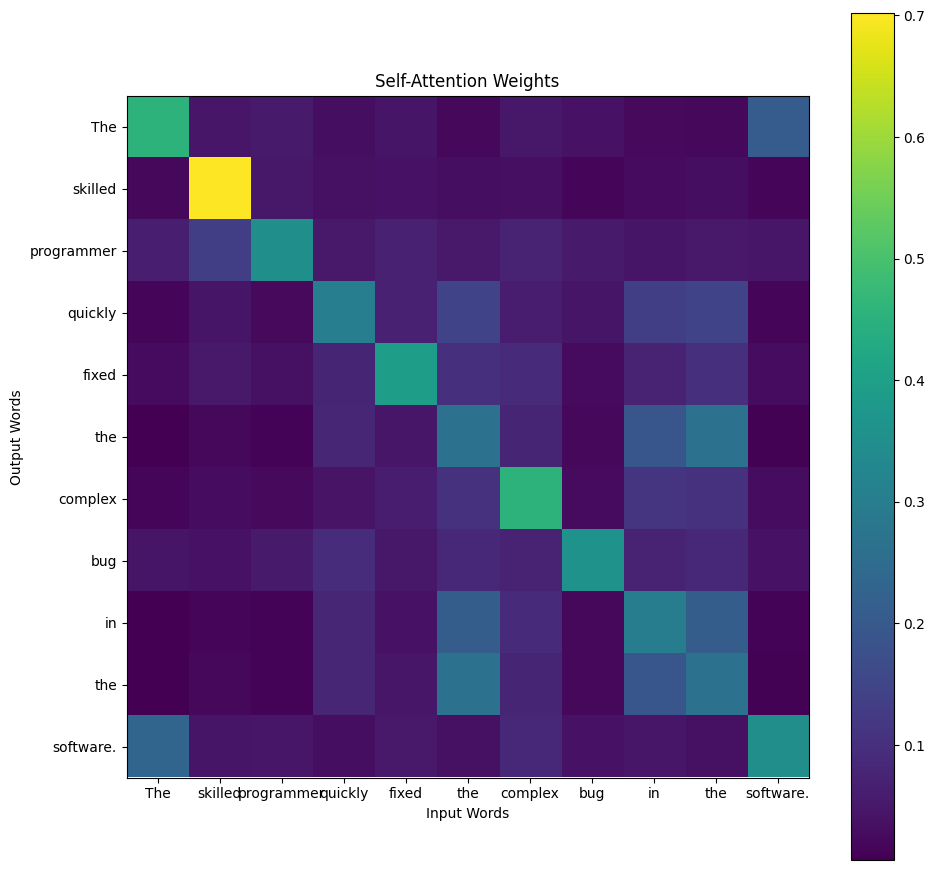

Attention Weights Shape: torch.Size([1, 11, 11])
Output Shape: torch.Size([1, 11, 50])


In [23]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import gensim.downloader as api

def self_attention_demo_sentence_glove(query, key, value, input_words, output_words):
    scores = torch.matmul(query, key.transpose(-2, -1))
    d_k = query.size(-1)
    scores = scores / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    attention_weights = F.softmax(scores, dim=-1)
    output = torch.matmul(attention_weights, value)

    # Visualize attention weights
    plt.figure(figsize=(len(input_words), len(output_words)))
    plt.imshow(attention_weights[0].detach().numpy(), cmap='viridis')
    plt.colorbar()
    plt.title('Self-Attention Weights')
    plt.xticks(np.arange(len(input_words)), input_words)
    plt.yticks(np.arange(len(output_words)), output_words)
    plt.xlabel('Input Words')
    plt.ylabel('Output Words')
    plt.show()

    return output, attention_weights

# Load GloVe embeddings
glove_vectors = api.load("glove-wiki-gigaword-50")

# Example sentence (English)
input_sentence = "The skilled programmer quickly fixed the complex bug in the software."
input_words = input_sentence.split()
seq_len = len(input_words)
embed_dim = glove_vectors.vector_size
batch_size = 1

# Get GloVe embeddings for input words
embeddings = []
for word in input_words:
    if word in glove_vectors:
        embeddings.append(glove_vectors[word])
    else:
        # Handle out-of-vocabulary words (e.g., random vector)
        embeddings.append(np.random.rand(embed_dim))

embeddings = np.array(embeddings)
query = torch.tensor(embeddings, dtype=torch.float32).unsqueeze(0)
key = query
value = query

# Simulate a "translation" scenario (just re-using the same words for simplicity)
output_words = input_words

output, attention_weights = self_attention_demo_sentence_glove(query, key, value, input_words, output_words)

print("Attention Weights Shape:", attention_weights.shape)
print("Output Shape:", output.shape)

#### Interpretation:

* Softmax Distribution:
    * Remember that the F.softmax function normalizes the attention scores into a probability distribution. This means that the attention weights will always sum up to 1 for each "output" word. Therefore, the range of 0 to 0.7 indicates the relative importance of each input word within that distribution.
* Uniform Attention (Baseline):
    * If the model were to pay equal attention to all input words, each word would receive an attention weight of 1/seq_len. In our example, with seq_len = 11, this would be 0.09. So, values around 0.1 would show a relatively uniform distribution of attention. An attention weight of 0.7 is very high in comparison.
* Because the query, key, and value are the same in this example, there will be a stronger weighting along the diagonal, but other weights will still be distributed.
* Interpreting the Specific Values:
     * Relative Importance: The differences in attention weights show the relative importance of each input word. A word with a weight of 0.5 is considered more relevant to the current "output" word than a word with a weight of 0.1.
* Contextual Relevance:
     * The distribution of attention weights across the input sentence indicates how the model is understanding the relationships between words.
     * If you see that certain words consistently receive higher attention weights, it suggests that the model is recognizing their importance in the context of the sentence.

##### With all that in mind, what can you say about the relevance of the words in our example sentence?

### C. The Transformer Architecture
The Transformer, introduced in the groundbreaking paper "Attention is All You Need" (Vaswani et al., 2017), revolutionized Natural Language Processing by dispensing with recurrent neural networks (RNNs) and convolutional neural networks (CNNs) in favor of attention mechanisms. This architectural shift enabled significant improvements in performance, particularly for tasks involving long sequences.

#### Key Concepts:

* Self-Attention:
    * Core Idea: Self-attention allows the model to relate different positions of the input sequence to each other, computing a representation of the sequence.
    * Mechanism:
        * For each word, the model computes three vectors: Query (Q), Key (K), and Value (V).
        * Attention scores are calculated by taking the dot product of the Query with each Key.
        * These scores are scaled (divided by the square root of the Key dimension) and passed through a Softmax function to obtain attention weights.
        * The Value vectors are then weighted by these attention weights, and the results are summed to produce the output.
        * This process enables the model to focus on the most relevant parts of the input when processing each word.
    * Self-attention captures long-range dependencies and contextual relationships within the input sequence.
* Multi-Head Attention:
    * Enhancing Representation: Multi-head attention extends self-attention by performing the attention mechanism multiple times in parallel, using different sets of Query, Key, and Value matrices.
    * Parallel Attention: Each "head" learns different attention patterns, capturing various aspects of the relationships between words.
    * Concatenation and Projection: The outputs from each head are concatenated and then linearly projected to produce the final output.
    * Benefits: Multi-head attention allows the model to capture richer and more diverse representations of the input sequence.
* Positional Encoding:
    * Addressing Sequence Order: Since the Transformer doesn't use recurrence, it needs a way to encode the position of words in the sequence.
    * Adding Positional Information: Positional encoding vectors are added to the input embeddings to provide information about the absolute or relative positions of the words.
    * Sine and Cosine Functions: The original Transformer paper used sine and cosine functions to generate positional encodings, allowing the model to extrapolate to longer sequences.
    * Importance: Positional encoding enables the model to understand the order of words, which is crucial for language understanding.
* Feed-Forward Networks:
    * Per-Position Processing: Each position in the sequence is processed independently by a feed-forward network.
    * Two Linear Transformations: The feed-forward network typically consists of two linear transformations with a ReLU activation function in between.
    * Layer-Wise Application: The same feed-forward network is applied to each position, but the parameters are shared across all positions.
    * Role: These feed-forward networks provide non-linearity and allow the model to learn more complex representations.
* Layer Normalization and Residual Connections:
    * Stabilizing Training: Layer normalization and residual connections are used to stabilize training and improve convergence.
    * Residual Connections (Skip Connections): Residual connections add the input of a sub-layer to its output, allowing gradients to flow more easily through the network.
    * Layer Normalization: Layer normalization normalizes the activations within each layer, reducing internal covariate shift and improving training stability.
    * Benefits: These techniques help to train deeper and more complex models, leading to better performance.
* Encoder-Decoder Structure:
    * The Transformer architecture typically consists of an encoder and a decoder.
    * Encoder: Processes the input sequence and produces a contextualized representation.
    * Decoder: Generates the output sequence, conditioned on the encoder's output.
    * Encoder-Decoder Attention: In the decoder, an additional attention mechanism is used to attend to the output of the encoder.

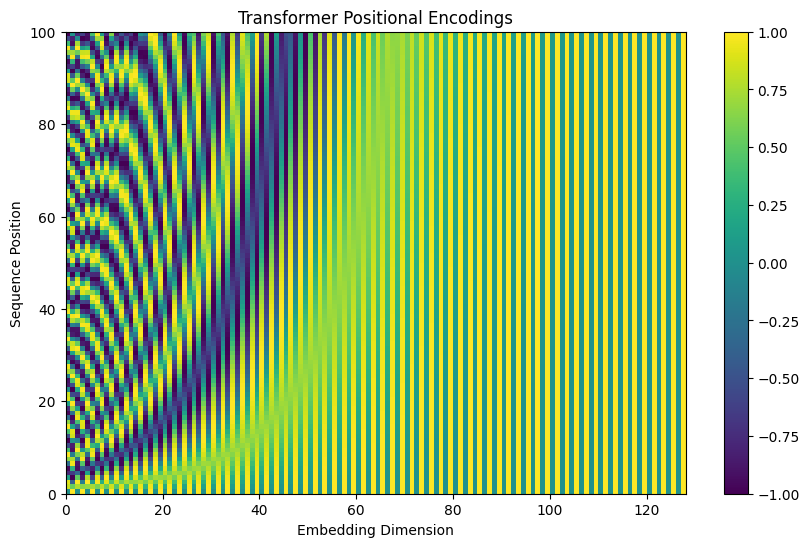

In [24]:
# Visualizing positional encodings
def get_positional_encoding(max_seq_len, d_model):
    """Create positional encoding matrix"""
    pe = torch.zeros(max_seq_len, d_model)
    position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
    
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    
    return pe

# Create and visualize positional encodings
max_seq_len = 100
d_model = 128
pe = get_positional_encoding(max_seq_len, d_model)

plt.figure(figsize=(10, 6))
plt.pcolormesh(pe.numpy(), cmap='viridis')
plt.xlabel('Embedding Dimension')
plt.ylabel('Sequence Position')
plt.colorbar()
plt.title('Transformer Positional Encodings')
plt.show()

#### Interpretation:

This code generates and visualizes the positional encodings used in the Transformer architecture. Let's break down what's happening:

1. get_positional_encoding(max_seq_len, d_model) Function:
    * Purpose: This function creates the positional encoding matrix.
    * Parameters:
        * max_seq_len: The maximum length of the input sequence.
        * d_model: The dimensionality of the word embeddings (and the positional encodings).
    * Steps:
        * Initialize Positional Encoding Matrix:
            * pe = torch.zeros(max_seq_len, d_model): Creates a tensor (pe) of zeros with the shape (max_seq_len, d_model). This will store the positional encodings.
        * Generate Position Vector:
            * position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1): Creates a tensor containing the position indices (0 to max_seq_len - 1). unsqueeze(1) adds an extra dimension to make it a column vector.
        * Calculate Divisor Term:
            * div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model)): Calculates the divisor term used in the sine and cosine functions. This term determines the frequency of the sine and cosine waves.
            * The formula exp(arange(0, d_model, 2) * (-log(10000.0) / d_model)) generates a sequence of frequencies that decrease exponentially.
        * Calculate Sine and Cosine Values:
            * pe[:, 0::2] = torch.sin(position * div_term): Calculates the sine values for the even-indexed dimensions of the positional encoding matrix.
            * pe[:, 1::2] = torch.cos(position * div_term): Calculates the cosine values for the odd-indexed dimensions.
        * Return Positional Encoding Matrix:
            * return pe: Returns the generated positional encoding matrix.
2. Creating and Visualizing Positional Encodings:
    * Set Parameters:
        * max_seq_len = 100: Sets the maximum sequence length to 100.
        * d_model = 128: Sets the embedding dimension to 128.
    * Generate Positional Encodings:
        * pe = get_positional_encoding(max_seq_len, d_model): Calls the function to create the positional encoding matrix.

##### Interpretation of the Visualization:

* X-axis (Embedding Dimension): Represents the dimensions of the positional encoding vectors.
* Y-axis (Sequence Position): Represents the position of words in the input sequence.
* Color Intensity: Represents the values of the positional encodings.
* Wave Patterns: The plot shows wave-like patterns because the positional encodings are generated using sine and cosine functions.
* Uniqueness: Each position in the sequence has a unique positional encoding vector. This allows the model to differentiate between different positions.
* Relative Positions: The patterns are designed so that the model can easily learn relative positions between words.
* Long Sequences: Because of the nature of the sine and cosine functions, the positional encodings can be extrapolated to longer sequences than the model was trained on.

In essence, this code generates and visualizes the positional encodings that are added to the input embeddings in the Transformer architecture. These encodings provide the model with information about the position of words in the sequence, which is essential for understanding language. The visualization shows how these encodings create unique patterns for each position, allowing the model to distinguish between different words in the sequence.

## What's next?

In previous labs, we've seen neural networks, including MLP, CNN, RNN, and GAN. In this lab, we moved into Natural Language Processing up to transformer architectures.

Next, we'll move on to Large Language Models (LLMs) and Generative AI. We'll explore how these models are built on the Transformer, how they're trained, and their real-world applications. LLMs are taking language processing to the next level, enabling text generation, complex question answering, and more.